In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df_original = pd.read_csv('..\Dataset\sismos_2000_2021.csv')

In [3]:
df_original.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-08-14T12:29:08.422Z,18.4079,-73.4753,10.0,7.2,mww,NaN,23.0,1.174,0.73,...,2021-08-17T19:37:37.550Z,"Nippes, Haiti",earthquake,5.8,1.8,0.031,97.0,reviewed,us,us
1,2021-07-21T21:15:12.265Z,7.3902,-82.7821,10.0,6.7,mww,NaN,61.0,1.397,0.64,...,2021-08-10T16:19:20.299Z,"71 km S of Punta de Burica, Panama",earthquake,7.7,1.8,0.038,68.0,reviewed,us,us
2,2021-05-19T00:42:19.688Z,-33.0647,-109.3943,10.0,6.7,mww,NaN,31.0,5.884,0.95,...,2021-07-24T21:08:06.040Z,southern East Pacific Rise,earthquake,10.5,1.7,0.083,14.0,reviewed,us,us
3,2021-02-03T05:23:43.520Z,-36.2797,-97.8000,10.0,6.7,mww,NaN,40.0,13.395,0.96,...,2021-04-16T19:03:09.040Z,West Chile Rise,earthquake,9.7,1.2,0.048,41.0,reviewed,us,us
4,2020-12-27T21:39:14.770Z,-39.3398,-74.9849,10.0,6.7,mww,NaN,19.0,1.319,0.63,...,2021-03-06T23:19:37.040Z,"146 km WNW of Corral, Chile",earthquake,5.8,1.7,0.048,42.0,reviewed,us,us


In [ ]:
df_original['date'] = df_original['time'].str.extract(r'(\w{4}-\w{2}-\w{2})')
df_original['date'] = pd.to_datetime(df_original['date'],format='%Y-%m-%d')
df_original.info()

<AxesSubplot:>

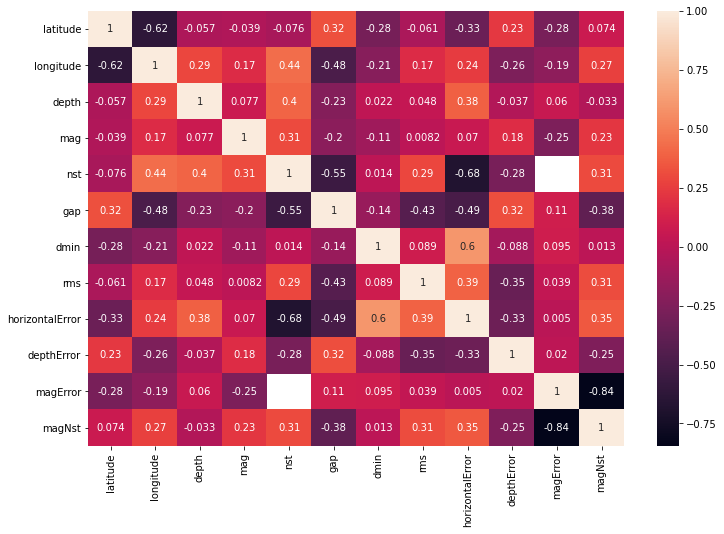

In [16]:
df_original_cor = df_original[['latitude','longitude','depth','mag', 'nst','gap','dmin','rms','horizontalError','depthError','magError','magNst']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(df_original_cor, annot=True)

In [25]:
df_original.groupby('magNst').agg({'mag':['mean', 'min','max']}).head(10)

mag          
        mean  min  max
magNst                
0.0     7.15  7.1  7.2
4.0     6.50  6.5  6.5
5.0     6.80  6.8  6.8
8.0     6.50  6.5  6.5
14.0    6.70  6.7  6.7
18.0    6.60  6.6  6.6
19.0    6.50  6.5  6.5
23.0    6.70  6.7  6.7
25.0    7.20  7.2  7.2
29.0    8.20  8.2  8.2

In [73]:
df_original_mex = df_original[df_original['place'].str.contains('Mexico')]
df_original_mex.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
7,2020-06-23T15:29:04.350Z,15.8861,-96.0077,20.0,7.4,mww,NaN,30.0,0.151,1.14,...,"9 km SE of Santa María Xadani, Mexico",earthquake,2.1,1.8,0.035,79.0,reviewed,us,us,2020-06-23
19,2019-02-01T16:14:12.329Z,14.6802,-92.4527,66.0,6.7,mww,NaN,43.0,0.289,1.36,...,"5 km SW of Puerto Madero, Mexico",earthquake,5.7,1.8,0.065,23.0,reviewed,us,us,2019-02-01


<AxesSubplot:xlabel='date', ylabel='mag'>

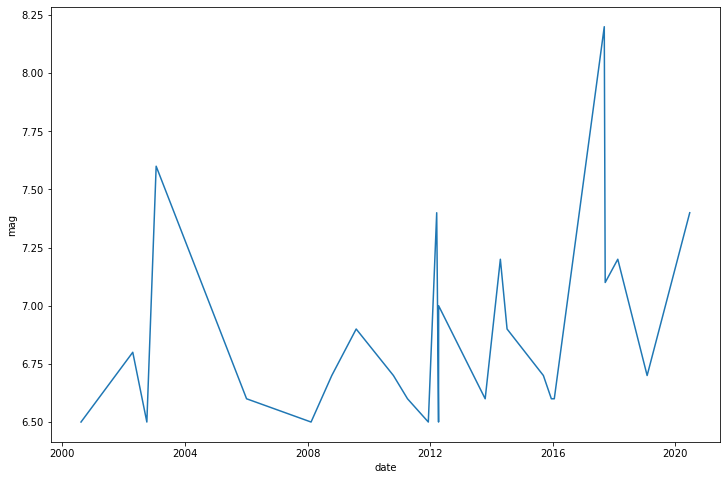

In [74]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_original_mex, x='date', y='mag')